**Project 1**

              -- Jianing Zhao & Xinan Wang

**Task 1**


Data sets,  “Data1.csv”, “Data2.csv”, “Data3.csv”, “Data4.csv”, “Data5.csv”, “Data6.csv”, “Data7.csv”, “Data8.csv” contain the data points and their respective class information. For each of the datasets follow the below steps

1. Use K-means and hierarchical clustering methods to generate clusters
2. Evaluate the performance of the clustering algorithm using external validation metrics
3. Plot (2D or 3D) the data points for each dataset and color them according to the original class
4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df1 = pd.read_csv('/content/drive/MyDrive/IE 5374/Project1/Data1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/IE 5374/Project1/Data2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/IE 5374/Project1/Data3.csv')
df4 = pd.read_csv('/content/drive/MyDrive/IE 5374/Project1/Data4.csv')
df5 = pd.read_csv('/content/drive/MyDrive/IE 5374/Project1/Data5.csv')
df6 = pd.read_csv('/content/drive/MyDrive/IE 5374/Project1/Data6.csv')
df7 = pd.read_csv('/content/drive/MyDrive/IE 5374/Project1/Data7.csv')
df8 = pd.read_csv('/content/drive/MyDrive/IE 5374/Project1/Data8.csv')

In [ ]:
!pip install plotly 
#!pip uninstall tornado
#!pip install tornado==4.5.3


In [185]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Data 1**

In [ ]:
df1

,Unnamed: 0,X1,X2,X3,Class,predictedclass1a,predictedclass1b
0,1,-0.063274,0.027734,0.022683,1,3,7
1,2,-0.000731,0.048211,0.069198,1,3,7
2,3,-0.060767,-0.009080,0.053085,1,3,7
3,4,0.013252,-0.011876,0.055324,1,3,7
4,5,-0.054508,-0.003813,0.001738,1,3,7
...,...,...,...,...,...,...,...
207,208,0.175738,-0.053478,-2.733752,7,1,4
208,209,0.396046,-0.858377,-3.126866,7,1,4
209,210,-0.406362,-0.334541,-2.885598,7,1,4
210,211,-0.299275,0.071281,-3.642585,7,1,4


1. (a) Use K-means to generate clusters

In [ ]:
# Use elbow method to find the appropriate n cluster value
from sklearn.cluster import KMeans
k = []
wcss = []
for i in range(1,10):
    mdl1 = KMeans(n_clusters=i)
    mdl1.fit(df1.iloc[:,1:4])
    k.append(i)
    wcss.append(mdl1.inertia_) 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


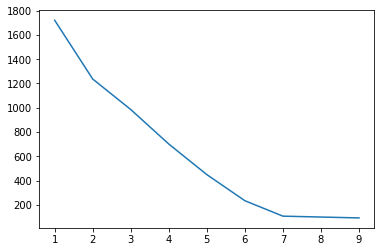

In [ ]:
sns.lineplot(k, wcss)

In [ ]:
# Use silhouette score to verify
from sklearn.metrics import silhouette_score
from sklearn import metrics

sil1 = []
k1s = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for ks1 in range(2,10):
  kmeans1 = KMeans(n_clusters = ks1)
  kmeans1.fit(df1.iloc[:,1:4])
  labels = kmeans1.labels_
  k1s.append(ks1)
  sil1.append(metrics.silhouette_score(df1.iloc[:,1:4], labels))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


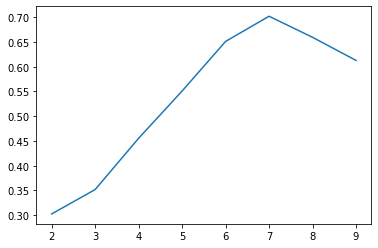

In [ ]:
sns.lineplot(k1s,sil1)

Peek at 7. Therefore, we will use 7 as the cluster value for K-Means method .

In [ ]:
# K-Means method and print out the SSE
mdl1_a = KMeans(n_clusters=7)
mdl1_a.fit(df1.iloc[:,1:4])
print('SSE Data 1: ' + str(mdl1_a.inertia_))

In [ ]:
mdl1_a.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
# Add predicted class to df1
df1['predictedclass1a'] = mdl1_a.labels_ + 1

In [ ]:
mdl1_a.cluster_centers_

array([[-4.72621667e-02,  4.58006333e-02, -3.04276190e+00],
       [-2.99518840e+00, -1.37363333e-02,  8.82396000e-02],
       [-4.24071875e-03,  4.75815625e-03,  7.24671875e-03],
       [ 2.99953830e+00, -1.13086667e-03, -1.40059600e-01],
       [ 1.39986933e-01,  3.08174697e+00,  7.45050000e-02],
       [ 2.27123000e-02, -2.96813597e+00, -1.11774567e-01],
       [-6.31190000e-03,  9.19421333e-02,  2.87236200e+00]])

(b) Use the hierarchical clustering methods to generate 
clusters

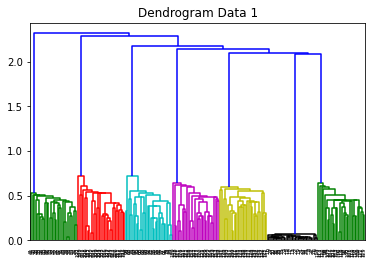

In [ ]:
# Draw the dendorgram for data 1 and get the n_cluster value
from scipy.cluster.hierarchy import dendrogram, linkage
z = linkage(df1.iloc[:, 1:4], method = 'single') 
dendrogram(z)
plt.title('Dendrogram Data 1')
plt.show()

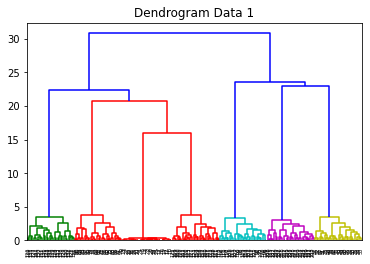

In [ ]:
z = linkage(df1.iloc[:, 1:4], method = 'ward') 
dendrogram(z)
plt.title('Dendrogram Data 1')
plt.show()

Therefore, We will use 7 as n_clusters for Hierarchical clustering method.

In [ ]:
# Hierarchical clustering method
from sklearn.cluster import AgglomerativeClustering
mdl1_b = AgglomerativeClustering(n_clusters=7) 
mdl1_b.fit(df1.iloc[:, 1:4])
mdl1_b.labels_

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [ ]:
df1['predictedclass1b'] = mdl1_b.labels_ + 1

2. Evaluate the performance of the clustering algorithm using external validation

In [ ]:
!pip install validclust

In [ ]:
df1

,Unnamed: 0,X1,X2,X3,Class,predictedclass1a,predictedclass1b
0,1,-0.063274,0.027734,0.022683,1,2,7
1,2,-0.000731,0.048211,0.069198,1,2,7
2,3,-0.060767,-0.009080,0.053085,1,2,7
3,4,0.013252,-0.011876,0.055324,1,2,7
4,5,-0.054508,-0.003813,0.001738,1,2,7
...,...,...,...,...,...,...,...
207,208,0.175738,-0.053478,-2.733752,7,3,4
208,209,0.396046,-0.858377,-3.126866,7,3,4
209,210,-0.406362,-0.334541,-2.885598,7,3,4
210,211,-0.299275,0.071281,-3.642585,7,3,4


In [ ]:
import numpy as np
contingency_matrix1k = metrics.cluster.contingency_matrix(df1['Class'], df1['predictedclass1a'])
contingency_matrix1k


array([[ 0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0],
       [ 0, 30,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 30,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0, 30],
       [30,  0,  0,  0,  0,  0,  0]])

In [ ]:
purity1k = np.sum(np.amax(contingency_matrix1k, axis=0)) / np.sum(contingency_matrix1k) 
purity1k

1.0

In [ ]:
contingency_matrix1h = metrics.cluster.contingency_matrix(df1['Class'], df1['predictedclass1b'])
contingency_matrix1h

array([[ 0,  0,  0,  0,  0,  0, 32],
       [ 0,  0,  0,  0, 30,  0,  0],
       [ 0,  0, 30,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 30,  0],
       [ 0, 30,  0,  0,  0,  0,  0],
       [30,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 30,  0,  0,  0]])

In [ ]:
purity1h = np.sum(np.amax(contingency_matrix1h, axis=0)) / np.sum(contingency_matrix1h) 
purity1h

1.0

In [ ]:
from sklearn.metrics.cluster import fowlkes_mallows_score, adjusted_rand_score 
print('df1 fowlkes mallows score for K-means method: ' + str(fowlkes_mallows_score(df1.iloc[:,4], df1['predictedclass1a'])))
print('df1 fowlkes mallows score for hierarchical method: ' + str(fowlkes_mallows_score(df1.iloc[:,4], df1['predictedclass1b'])))

df1 fowlkes mallows score for K-means method: 1.0
df1 fowlkes mallows score for hierarchical method: 1.0


In conclusion, the purity for both K-means and hierarchical methods are 1.0,which means each cluster contains only examples from the same class in both methods. The fowlkes mallows scores for both methods are 1.0, which means the high similarity between the clusters and the benchmark classifications in both methods.

3. Plot (2D or 3D) the data points for each dataset and color them according to the original class


In [ ]:
# Plot the dataset according to the original class
fig = px.scatter_3d(df1, x='X1', y='X2', z='X3',
              color='Class')
fig.show()

4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm

In [ ]:
# Plot the dataset according to the K-mean clustering algorithm
fig = px.scatter_3d(df1, x='X1', y = 'X2', z='X3', color = 'predictedclass1a')
fig.show()

In [ ]:
# Plot the dataset according to the hierarchical clustering algorithm
fig = px.scatter_3d(df1, x='X1', y='X2', z='X3', color='predictedclass1b')
fig.show()

**Data 2**

In [ ]:
df2

,Unnamed: 0,X,Y,C,Class
0,X1,3.277701,0.814082,0.326574,1
1,X2,0.387577,0.176780,0.888046,1
2,X3,0.268546,0.582963,0.080981,1
3,X4,2.031145,0.244597,0.643921,1
4,X5,0.188677,0.461280,0.496633,1
...,...,...,...,...,...
399,X400,3.248655,2.297291,3.388138,3
400,X,4.100000,5.100000,0.504558,4
401,X.1,3.900000,4.900000,0.941634,4
402,X.2,4.000000,5.000000,0.702123,4


1. K - means

In [ ]:
k2 = []
wcss2 = []
for i2 in range(1,10):
  mdl2 = KMeans(n_clusters=i2)
  mdl2.fit(df2.iloc[:,1:4])
  k2.append(i2)
  wcss2.append(mdl2.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


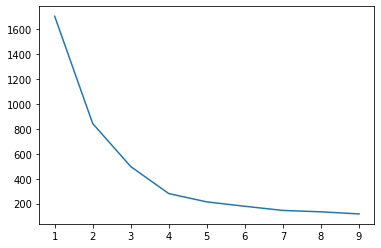

In [ ]:
sns.lineplot(k2,wcss2)

In [233]:
sil2 = []
k2s = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for ks2 in range(2,10):
  kmeans2 = KMeans(n_clusters = ks2)
  kmeans2.fit(df2.iloc[:,1:4])
  labels = kmeans2.labels_
  k2s.append(ks2)
  sil2.append(metrics.silhouette_score(df2.iloc[:,1:4], labels))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


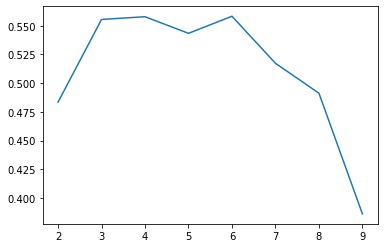

In [ ]:
sns.lineplot(k2s,sil2)

We get a peek at n = 4. Therefore, we use 4 as n-cluster value for k-means method.

In [ ]:
mdl2_a = KMeans(n_clusters=4)
mdl2_a.fit(df2.iloc[:,1:4])
print('SSE Data 2: '+str(mdl2_a.inertia_))

SSE Data 2: 280.1321159627272


In [ ]:
# Add predicted class into data 2
df2['predictedclass2a'] = mdl2_a.labels_ + 1

In [ ]:
mdl2_a.cluster_centers_

array([[2.9348529 , 2.55931128, 2.55146488],
       [3.04451388, 0.51152101, 0.48663013],
       [1.1534002 , 4.08301554, 1.04313881],
       [1.0118234 , 0.75530155, 0.5346417 ]])

(b) Use hierarchical clustering methods to generate clusters

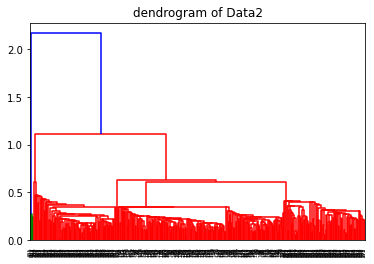

In [ ]:
z2 = linkage(df2.iloc[:,1:4],method='single')
dendrogram(z2)
plt.title('dendrogram of Data2')
plt.show()

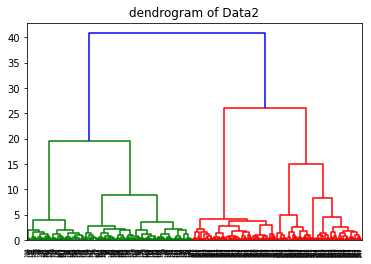

In [ ]:
z2 = linkage(df2.iloc[:,1:4],method='ward')
dendrogram(z2)
plt.title('dendrogram of Data2')
plt.show()

Therefore, we use 4 as the n-cluster value

In [234]:
mdl2_b = AgglomerativeClustering(n_clusters=4)
mdl2_b.fit(df2.iloc[:,1:4])
mdl2_b.labels_

array([3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3, 1, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 3, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1,
       3, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 1, 1, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 1, 1, 3, 1,
       1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [ ]:
# Add predicted class using hierarchical clustering method
df2['predictedclass2b'] = mdl2_b.labels_ + 1

2. Evaluate the performance of the clustering algorithm using external validation metrics

In [ ]:
df2

,Unnamed: 0,X,Y,C,Class,predictedclass2a,predictedclass2b
0,X1,3.277701,0.814082,0.326574,1,2,4
1,X2,0.387577,0.176780,0.888046,1,4,2
2,X3,0.268546,0.582963,0.080981,1,4,2
3,X4,2.031145,0.244597,0.643921,1,2,2
4,X5,0.188677,0.461280,0.496633,1,4,2
...,...,...,...,...,...,...,...
399,X400,3.248655,2.297291,3.388138,3,1,3
400,X,4.100000,5.100000,0.504558,4,3,1
401,X.1,3.900000,4.900000,0.941634,4,3,1
402,X.2,4.000000,5.000000,0.702123,4,3,1


In [ ]:
contingency_matrix2k = metrics.cluster.contingency_matrix(df2['Class'], df2['predictedclass2a'])
contingency_matrix2k

array([[  0,  83,   0, 117],
       [  0,   0,  76,  24],
       [100,   0,   0,   0],
       [  0,   0,   4,   0]])

In [ ]:
purity2k = np.sum(np.amax(contingency_matrix2k, axis=0)) / np.sum(contingency_matrix2k) 
purity2k


0.9306930693069307

In [ ]:
contingency_matrix2h = metrics.cluster.contingency_matrix(df2['Class'], df2['predictedclass2b'])
contingency_matrix2h

array([[  0, 131,   0,  69],
       [100,   0,   0,   0],
       [  0,   0, 100,   0],
       [  4,   0,   0,   0]])

In [ ]:
purity2h = np.sum(np.amax(contingency_matrix2h, axis=0)) / np.sum(contingency_matrix2h) 
purity2h


0.9900990099009901

In [ ]:
print('df2 fowlkes mallows score for K-means method: ' + str(fowlkes_mallows_score(df2.iloc[:,4], df2['predictedclass2a'])))
print('df2 fowlkes mallows score for hierarchical method: ' + str(fowlkes_mallows_score(df2.iloc[:,4], df2['predictedclass2b'])))

df2 fowlkes mallows score for K-means method: 0.7237292929817782
df2 fowlkes mallows score for hierarchical method: 0.8267843729687627


The purity for both methods are greater than 0.9, which means each cluster contains almost only examples from the same class. The fowlkes mallows score for hierarchical method is greater than that of the k-means method, which means there is a high similarity between the clusters and the benchmark classifications in hierarchical method.

3.Plot (2D or 3D) the data points for each dataset and color them according to the
original class

In [ ]:
fig = px.scatter_3d(df2, x='X', y = 'Y', z='C', color = 'Class')
fig.show()

4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm

In [ ]:
# According to the k-mean clustering algorithm
fig = px.scatter_3d(df2, x='X', y = 'Y', z='C', color = 'predictedclass2a')
fig.show()

In [ ]:
# According to the hierarchical clustering algorithm
fig = px.scatter_3d(df2, x='X', y = 'Y', z='C', color = 'predictedclass2b')
fig.show()

**Data 3**

In [ ]:
df3

1. (a)Use K-means clustering methods to generate clusters

In [ ]:
k3 = []
wcss3 = []
for i3 in range(1,10):
  mdl3 = KMeans(n_clusters=i3)
  mdl3.fit(df3.iloc[:,1:4])
  k3.append(i3)
  wcss3.append(mdl3.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


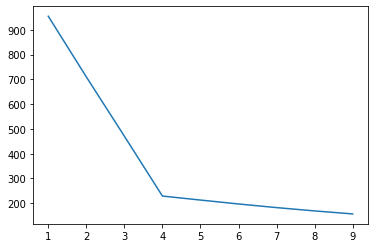

In [ ]:
sns.lineplot(k3,wcss3)

Therefore, we use 4 as n-cluster value

In [ ]:
mdl3_a = KMeans(n_clusters=4)
mdl3_a.fit(df3.iloc[:,1:4])
print('SSE Data 3: '+str(mdl3_a.inertia_))

SSE Data 3: 229.0487999751335


In [ ]:
df3['predictedclass3a'] = mdl3_a.labels_ +1

In [ ]:
mdl3_a.cluster_centers_

array([[-0.51838252,  1.0347351 , -0.42573357],
       [-0.51838252, -1.16526495, -0.42573357],
       [ 0.11670268, -0.06526492,  1.37055896],
       [ 1.3868734 , -0.06526492, -0.42573357]])

(b) Use hierarchical clustering methods to generate clusters

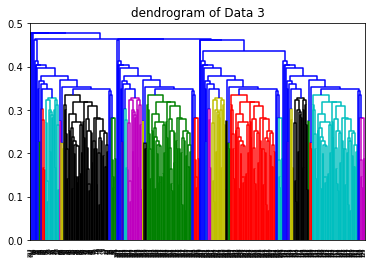

In [ ]:
# Plot the dendrogram and get the n_cluster value
z3 = linkage(df3.iloc[:,1:4],method='single')
dendrogram(z3)
plt.title('dendrogram of Data 3')
plt.show()

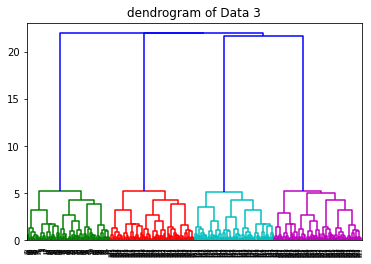

In [ ]:
z3 = linkage(df3.iloc[:,1:4],method='ward')
dendrogram(z3)
plt.title('dendrogram of Data 3')
plt.show()

Therefore, we use 4 as n-cluster value

In [ ]:
mdl3_b = AgglomerativeClustering(n_clusters=4)
mdl3_b.fit(df3.iloc[:,1:4])
mdl3_b.labels_

In [ ]:
df3['predictedclass3b'] = mdl3_b.labels_ + 1

2. Evaluate the performance of the clustering algorithm using external validation
metrics

In [ ]:
df3

,Unnamed: 0,X1,X2,X3,Class,predictedclass3a,predictedclass3b
0,1,1.295428,0.050829,-0.385217,1,4,2
1,2,1.409178,-0.035191,-0.251980,1,4,2
2,3,1.096803,0.246365,-0.415011,1,4,2
3,4,1.463328,0.265354,-0.513488,1,4,2
4,5,1.603284,0.080577,-0.470257,1,4,2
...,...,...,...,...,...,...,...
395,396,0.795695,0.209456,1.880609,4,3,3
396,397,0.653127,-0.703156,1.549448,4,3,3
397,398,-0.726249,-0.103244,0.694300,4,3,3
398,399,0.808596,-0.492640,1.649370,4,3,3


In [ ]:
contingency_matrix3k = metrics.cluster.contingency_matrix(df3['Class'], df3['predictedclass3a'])
contingency_matrix3k

array([[  0,   0,   0, 100],
       [100,   0,   0,   0],
       [  0, 100,   0,   0],
       [  0,   0, 100,   0]])

In [ ]:
purity3k = np.sum(np.amax(contingency_matrix3k, axis=0)) / np.sum(contingency_matrix3k) 
purity3k

1.0

In [ ]:
contingency_matrix3h = metrics.cluster.contingency_matrix(df3['Class'], df3['predictedclass3b'])
contingency_matrix3h

In [ ]:
purity3h = np.sum(np.amax(contingency_matrix3h, axis=0)) / np.sum(contingency_matrix3h) 
purity3h

0.9875

In [ ]:
print('df3 fowlkes mallows score for K-means method: ' + str(fowlkes_mallows_score(df3.iloc[:,4], df3['predictedclass3a'])))
print('df3 fowlkes mallows score for hierarchical method: ' + str(fowlkes_mallows_score(df3.iloc[:,4], df3['predictedclass3b'])))

df3 fowlkes mallows score for K-means method: 1.0
df3 fowlkes mallows score for hierarchical method: 0.9753945158961902


The purity for k-means method is 1.0, which means each cluster contains only examples from the same class. The purity for hierarchical method is 0.9875, which means each cluster almost contains only examples from the same class.The fowlkes mallows score are both greater than 0.97, which means the high similarity between the clusters and the benchmark classifications in both methods.

3. Plot (2D or 3D) the data points for each dataset and color them according to the
original class

In [ ]:
fig = px.scatter_3d(df3, x='X1', y = 'X2', z='X3', color = 'Class')
fig.show()

4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm

In [ ]:
# According to the K-mean clustering algorithm
fig = px.scatter_3d(df3, x='X1', y = 'X2', z='X3', color = 'predictedclass3a')
fig.show()

In [ ]:
# According to the hierarchical clustering method
fig = px.scatter_3d(df3, x='X1', y = 'X2', z='X3', color = 'predictedclass3b')
fig.show()

**Data 4**

In [ ]:
df4

,Unnamed: 0,X1,X2,X3,Class
0,1,-0.45300,-0.8910,0.02300,1
1,2,0.65300,-0.8460,0.02110,1
2,3,0.39800,0.9130,-0.00139,1
3,4,0.09520,1.0500,0.00628,1
4,5,0.52400,-0.9410,0.03780,1
...,...,...,...,...,...
995,996,0.01520,0.0531,-0.36100,2
996,997,0.05160,0.6910,0.87500,2
997,998,-0.00511,1.3900,-0.94700,2
998,999,-0.06710,0.7140,0.88100,2


1. (a) Use K-means  clustering methods to generate clusters

In [ ]:
k4 = []
wcss4 = []
for i4 in range(1,11):
  mdl4 = KMeans(n_clusters=i4)
  mdl4.fit(df4.iloc[:,1:4])
  k4.append(i4)
  wcss4.append(mdl4.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



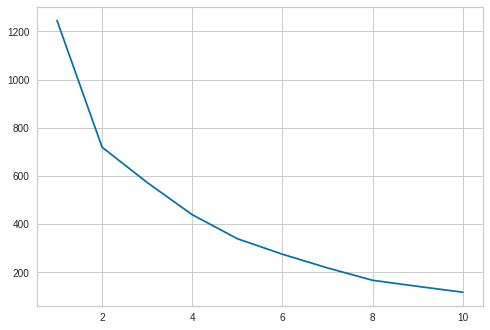

In [ ]:
sns.lineplot(k4,wcss4)

Therefore, we will use 2 as n-cluster value

In [ ]:
mdl4_a = KMeans(n_clusters=2)
mdl4_a.fit(df4.iloc[:,1:4])
print('SSE Data4: '+str(mdl4_a.inertia_))

SSE Data4: 719.3443269685367


In [ ]:
mdl4_a.labels_

In [ ]:
df4['predictedclass4a'] = mdl4_a.labels_ + 1

In [ ]:
mdl4_a.cluster_centers_

array([[-1.66176447e-02, -2.94129933e-01,  8.49923812e-03],
       [ 8.84493587e-04,  1.15671543e+00, -2.43330581e-02]])

(b) Use hierarchical clustering methods to generate clusters

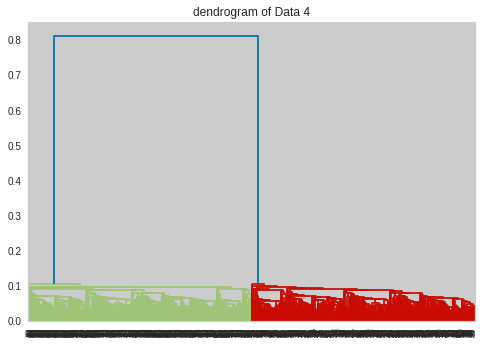

In [ ]:
# Plot the dendrogram and get the n_cluster value
z4 = linkage(df4.iloc[:,1:4],method = 'single')
dendrogram(z4)
plt.title('dendrogram of Data 4')
plt.show()

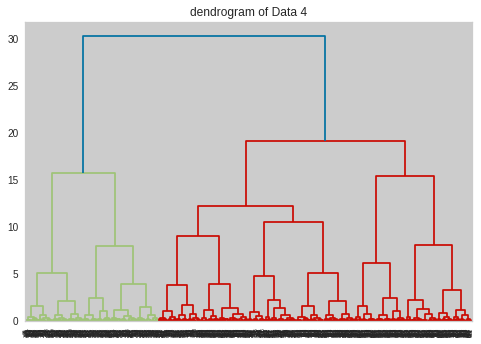

In [ ]:
z4 = linkage(df4.iloc[:,1:4],method = 'ward')
dendrogram(z4)
plt.title('dendrogram of Data 4')
plt.show()

Therefore, we will use 2 as n_cluster value

In [235]:
mdl4_b = AgglomerativeClustering(n_clusters=2)
mdl4_b.fit(df4.iloc[:,1:4])
mdl4_b.labels_

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,

In [ ]:
df4['predictedclass4b'] = mdl4_b.labels_ + 1

2. Evaluate the performance of the clustering algorithm using external validation metrics

In [ ]:
df4

,Unnamed: 0,X1,X2,X3,Class,predictedclass4a,predictedclass4b
0,1,-0.45300,-0.8910,0.02300,1,2,2
1,2,0.65300,-0.8460,0.02110,1,2,2
2,3,0.39800,0.9130,-0.00139,1,1,1
3,4,0.09520,1.0500,0.00628,1,1,1
4,5,0.52400,-0.9410,0.03780,1,2,2
...,...,...,...,...,...,...,...
995,996,0.01520,0.0531,-0.36100,2,2,1
996,997,0.05160,0.6910,0.87500,2,1,1
997,998,-0.00511,1.3900,-0.94700,2,1,1
998,999,-0.06710,0.7140,0.88100,2,1,1


In [ ]:
contingency_matrix4k = metrics.cluster.contingency_matrix(df4['Class'], df4['predictedclass4a'])
contingency_matrix4k

array([[173, 327],
       [326, 174]])

In [ ]:
purity4k = np.sum(np.amax(contingency_matrix4k, axis=0)) / np.sum(contingency_matrix4k) 
purity4k

0.653

In [ ]:
contingency_matrix4h = metrics.cluster.contingency_matrix(df4['Class'], df4['predictedclass4b'])
contingency_matrix4h

array([[201, 299],
       [500,   0]])

In [ ]:
purity4h = np.sum(np.amax(contingency_matrix4h, axis=0)) / np.sum(contingency_matrix4h) 
purity4h

0.799

In [ ]:
print('df4 fowlkes mallows score for K-means method: ' + str(fowlkes_mallows_score(df4.iloc[:,4], df4['predictedclass4a'])))
print('df4 fowlkes mallows score for hierarchical method: ' + str(fowlkes_mallows_score(df4.iloc[:,4], df4['predictedclass4b'])))

df4 fowlkes mallows score for K-means method: 0.5459107296389125
df4 fowlkes mallows score for hierarchical method: 0.7042423466085546


The purity shows there are higher percentage of examples
staying their own class in each cluster in hierarchial method than in k-means method. The Fowlkes Mallows score shows that in hierarchial method, there is a greater similarity between the clusters and the benchmark classifications class. 

3. Plot (2D or 3D) the data points for each dataset and color them according to the original class

In [ ]:
fig = px.scatter_3d(df4, x='X1', y = 'X2', z='X3', color = 'Class')
fig.show()

4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm

In [ ]:
# According to k-means clustering algorithm
fig = px.scatter_3d(df4, x='X1', y = 'X2', z='X3', color = 'predictedclass4a')
fig.show()

In [ ]:
# According to hierarchical clustering algorithm
fig = px.scatter_3d(df4, x='X1', y = 'X2', z='X3', color = 'predictedclass4b')
fig.show()

**Data 5**

In [ ]:
df5

,Unnamed: 0,X1,X2,X3,Class
0,1,-4.822490,-50.402170,4.020861,1
1,2,-44.460120,20.964670,-11.492060,1
2,3,50.001020,0.780748,9.134460,1
3,4,-41.699080,-22.310060,16.314120,1
4,5,4.425242,-4.666664,50.223740,1
...,...,...,...,...,...
795,796,-1.531027,0.681636,0.543271,2
796,797,0.500754,-1.848209,0.605654,2
797,798,1.089574,-0.246493,-3.355758,2
798,799,-1.907717,4.964502,2.098423,2


1. (a) Use K-means clustering methods to generate clusters

In [ ]:
k5 = []
wcss5 = []
for i5 in range(1,10):
  mdl5 = KMeans(n_clusters=i5)
  mdl5.fit(df5.iloc[:,1:4])
  k5.append(i5)
  wcss5.append(mdl5.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



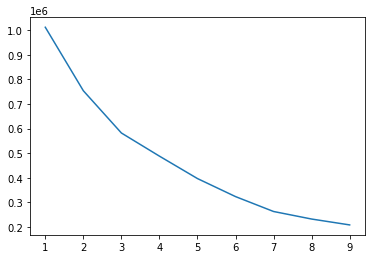

In [ ]:
sns.lineplot(k5,wcss5)

In [236]:
sil5 = []
k5s = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for ks5 in range(2,10):
  kmeans5 = KMeans(n_clusters = ks5)
  kmeans5.fit(df5.iloc[:,1:4])
  labels = kmeans5.labels_
  k5s.append(ks5)
  sil5.append(metrics.silhouette_score(df5.iloc[:,1:4], labels))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



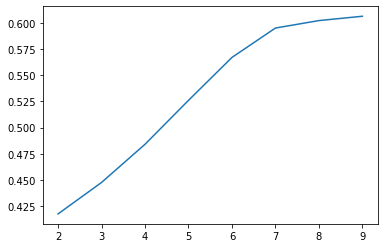

In [ ]:
sns.lineplot(k5s,sil5)

Therefore, we will use 7 as n_cluster value

In [ ]:
mdl5_a = KMeans(n_clusters=7)
mdl5_a.fit(df5.iloc[:,1:4])
print('SSE Data 5: '+str(mdl5_a.inertia_))

SSE Data 5: 263291.3353067595


In [ ]:
mdl5_a.labels_

array([3, 5, 4, 0, 2, 4, 2, 4, 4, 2, 0, 3, 6, 3, 2, 4, 5, 2, 0, 3, 3, 0,
       5, 6, 3, 4, 2, 5, 0, 6, 3, 0, 0, 5, 2, 0, 0, 0, 2, 2, 3, 2, 4, 6,
       3, 3, 2, 3, 5, 5, 6, 6, 6, 6, 2, 3, 6, 6, 2, 3, 5, 0, 5, 6, 6, 3,
       2, 6, 0, 6, 4, 0, 6, 2, 4, 3, 2, 6, 2, 0, 2, 5, 6, 0, 5, 0, 2, 3,
       6, 2, 4, 0, 2, 4, 5, 5, 4, 3, 2, 5, 3, 2, 6, 5, 5, 5, 2, 4, 0, 5,
       3, 0, 0, 5, 3, 6, 2, 2, 4, 2, 5, 6, 5, 6, 5, 4, 2, 3, 0, 2, 3, 0,
       2, 2, 6, 4, 0, 6, 0, 2, 6, 3, 4, 6, 3, 6, 3, 2, 5, 0, 6, 2, 6, 3,
       6, 0, 4, 6, 3, 6, 6, 4, 2, 6, 6, 4, 3, 2, 6, 0, 5, 3, 6, 6, 6, 2,
       0, 3, 2, 6, 0, 0, 3, 2, 0, 4, 2, 5, 0, 0, 4, 2, 0, 4, 5, 2, 6, 3,
       6, 0, 3, 5, 5, 3, 6, 6, 5, 6, 6, 2, 3, 4, 2, 2, 3, 3, 6, 5, 5, 3,
       3, 2, 4, 6, 0, 5, 6, 6, 3, 0, 3, 5, 0, 5, 2, 4, 6, 3, 4, 6, 4, 6,
       0, 6, 4, 6, 5, 6, 5, 2, 2, 0, 6, 0, 0, 5, 2, 4, 5, 2, 6, 6, 6, 3,
       6, 3, 6, 2, 4, 0, 2, 3, 2, 2, 3, 6, 6, 5, 2, 6, 6, 6, 4, 6, 3, 2,
       2, 4, 0, 2, 4, 0, 5, 6, 5, 2, 0, 6, 6, 2, 2,

In [ ]:
df5['predictedclass5a'] = mdl5_a.labels_ + 1

In [ ]:
mdl5_a.cluster_centers_

array([[-3.25412582e+01, -2.50981105e+01,  1.22992662e+01],
       [ 1.68300019e-01, -1.49451918e-04,  2.09441773e-01],
       [ 3.65885495e-01,  7.48988778e-01,  4.57546539e+01],
       [ 2.41577035e+01, -3.44351738e+01, -1.61643702e+00],
       [ 3.17920818e+01,  2.64768540e+01,  5.31529397e+00],
       [-2.82368599e+01,  3.07201437e+01,  2.33109198e+00],
       [-2.09953056e+00, -3.76691836e+00, -4.35723048e+01]])

(b) Use hierarchical clustering methods to generate clusters

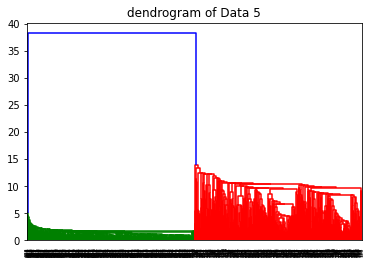

In [ ]:
# Plot the dendrogram and get the n_cluster value
z5 = linkage(df5.iloc[:,1:4],method='single')
dendrogram(z5)
plt.title('dendrogram of Data 5')
plt.show()

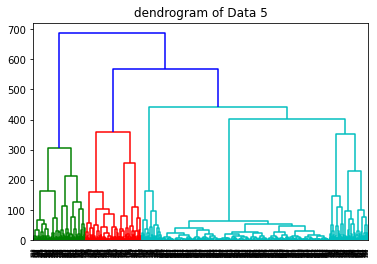

In [ ]:
z5 = linkage(df5.iloc[:,1:4],method='ward')
dendrogram(z5)
plt.title('dendrogram of Data 5')
plt.show()

Therefore, we will use 2 as n_cluster value

In [237]:
mdl5_b = AgglomerativeClustering(n_clusters=2)
mdl5_b.fit(df5.iloc[:,1:4])
mdl5_b.labels_

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

In [ ]:
df5['predictedclass5b'] = mdl5_b.labels_ + 1

2. Evaluate the performance of the clustering algorithm using external validation metrics

In [ ]:
df5

,Unnamed: 0,X1,X2,X3,Class,predictedclass5a,predictedclass5b
0,1,-4.822490,-50.402170,4.020861,1,4,2
1,2,-44.460120,20.964670,-11.492060,1,6,1
2,3,50.001020,0.780748,9.134460,1,5,1
3,4,-41.699080,-22.310060,16.314120,1,1,1
4,5,4.425242,-4.666664,50.223740,1,3,1
...,...,...,...,...,...,...,...
795,796,-1.531027,0.681636,0.543271,2,2,1
796,797,0.500754,-1.848209,0.605654,2,2,1
797,798,1.089574,-0.246493,-3.355758,2,2,1
798,799,-1.907717,4.964502,2.098423,2,2,1


In [ ]:
contingency_matrix5k = metrics.cluster.contingency_matrix(df5['Class'], df5['predictedclass5a'])
contingency_matrix5k

array([[  0,  56,  97,  82,  52,  53,  60],
       [400,   0,   0,   0,   0,   0,   0]])

In [ ]:
purity5k = np.sum(np.amax(contingency_matrix5k, axis=0)) / np.sum(contingency_matrix5k) 
purity5k

1.0

In [ ]:
contingency_matrix5h = metrics.cluster.contingency_matrix(df5['Class'], df5['predictedclass5b'])
contingency_matrix5h

array([[274, 126],
       [400,   0]])

In [ ]:
purity5h = np.sum(np.amax(contingency_matrix5h, axis=0)) / np.sum(contingency_matrix5h) 
purity5h

0.6575

In [ ]:
print('df5 fowlkes mallows score for K-means method: ' + str(fowlkes_mallows_score(df5.iloc[:,4], df5['predictedclass5a'])))
print('df5 fowlkes mallows score for hierarchical method: ' + str(fowlkes_mallows_score(df5.iloc[:,4], df5['predictedclass5b'])))

df5 fowlkes mallows score for K-means method: 0.7665917474563435
df5 fowlkes mallows score for hierarchical method: 0.6462836986049043


The purity for k-means method is 0.6575, which means some cluster contains examples
from other classes in hierarchial method, where as in k-means method, all the clusters contains only examples from the same class. The fowlkes mallows score shows that in both methods, there is a moderate dissimilarity between the clusters and the benchmark classifications.

3. Plot (2D or 3D) the data points for each dataset and color them according to the original class

In [ ]:
fig = px.scatter_3d(df5, x='X1', y = 'X2', z='X3', color = 'Class')
fig.show()

4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm

In [ ]:
# According to k-means clustering algorithm
fig = px.scatter_3d(df5, x='X1', y = 'X2', z='X3', color = 'predictedclass5a')
fig.show()

In [ ]:
# According to hierarchical clustering method
fig = px.scatter_3d(df5, x='X1', y = 'X2', z='X3', color = 'predictedclass5b')
fig.show()

**Data 6**

In [ ]:
df6

,Unnamed: 0,X1,X2,Class
0,1,1.388261,2.076096,1
1,2,2.177247,3.102304,1
2,3,0.378645,5.307610,1
3,4,3.681732,1.622681,1
4,5,2.462861,2.777897,1
...,...,...,...,...
4091,4092,0.909687,0.375763,2
4092,4093,2.698381,0.511262,2
4093,4094,1.078797,1.526153,2
4094,4095,1.974889,-0.649343,2


1. (a) Use K-means clustering methods to generate clusters

In [ ]:
k6 = []
wcss6 = []
for i6 in range(1,11):
  mdl6 = KMeans(n_clusters=i6)
  mdl6.fit(df6.iloc[:,1:3])
  k6.append(i6)
  wcss6.append(mdl6.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



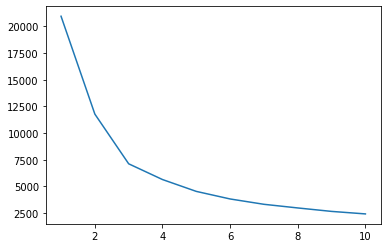

In [ ]:
sns.lineplot(k6,wcss6)

Therefore, we use 3 as n_cluster value

In [ ]:
mdl6_a = KMeans(n_clusters=3)
mdl6_a.fit(df6.iloc[:,1:3])
print('SSE Data 6: ' + str(mdl6_a.inertia_))

SSE Data 6: 7114.171975081947


In [ ]:
mdl6_a.labels_

array([2, 1, 1, ..., 0, 0, 0], dtype=int32)

In [ ]:
df6['predictedclass6a'] = mdl6_a.labels_ + 1

In [ ]:
mdl6_a.cluster_centers_

array([[0.33958768, 0.33916125],
       [1.00793685, 3.89358379],
       [2.98566042, 1.71766642]])

(b) Use hierarchical clustering methods to generate clusters

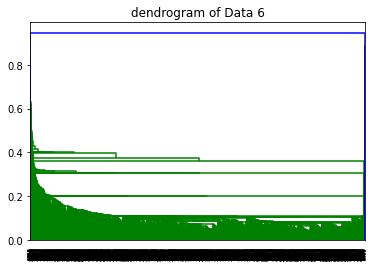

In [ ]:
# Plot the dendrogram and get the n_cluster value
z6 = linkage(df6.iloc[:,1:3],method='single')
dendrogram(z6)
plt.title('dendrogram of Data 6')
plt.show()

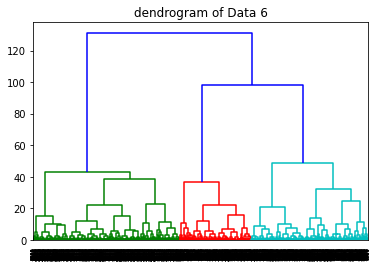

In [ ]:
z6 = linkage(df6.iloc[:,1:3],method='ward')
dendrogram(z6)
plt.title('dendrogram of Data 6')
plt.show()

Therefore, we use 2 as n_cluster value

In [ ]:
mdl6_b = AgglomerativeClustering(n_clusters=2)
mdl6_b.fit(df6.iloc[:,1:3])
mdl6_b.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
df6['predictedclass6b'] = mdl6_b.labels_ + 1

2. Evaluate the performance of the clustering algorithm using external validation metrics

In [ ]:
df6

,Unnamed: 0,X1,X2,Class,predictedclass6a,predictedclass6b
0,1,1.388261,2.076096,1,3,1
1,2,2.177247,3.102304,1,2,1
2,3,0.378645,5.307610,1,2,1
3,4,3.681732,1.622681,1,3,1
4,5,2.462861,2.777897,1,3,1
...,...,...,...,...,...,...
4091,4092,0.909687,0.375763,2,1,2
4092,4093,2.698381,0.511262,2,3,1
4093,4094,1.078797,1.526153,2,1,2
4094,4095,1.974889,-0.649343,2,1,2


In [ ]:
contingency_matrix6k = metrics.cluster.contingency_matrix(df6['Class'], df6['predictedclass6a'])
contingency_matrix6k

array([[  14, 1065,  969],
       [1781,   66,  201]])

In [ ]:
purity6k = np.sum(np.amax(contingency_matrix6k, axis=0)) / np.sum(contingency_matrix6k) 
purity6k

0.931396484375

In [ ]:
contingency_matrix6h = metrics.cluster.contingency_matrix(df6['Class'], df6['predictedclass6b'])
contingency_matrix6h

array([[2016,   32],
       [ 280, 1768]])

In [ ]:
purity6h = np.sum(np.amax(contingency_matrix6h, axis=0)) / np.sum(contingency_matrix6h) 
purity6h

0.923828125

In [ ]:
print('df6 fowlkes mallows score for K-means method: ' + str(fowlkes_mallows_score(df6.iloc[:,3], df6['predictedclass6a'])))
print('df6 fowlkes mallows score for hierarchical method: ' + str(fowlkes_mallows_score(df6.iloc[:,3], df6['predictedclass6b'])))

df6 fowlkes mallows score for K-means method: 0.7537336993699058
df6 fowlkes mallows score for hierarchical method: 0.8602399807978651


The purity for both methods are greater than 0.92, which means the clusters contains mostly examples from the same class. The fowlkes mallows score shows that there is a moderate dissimilarity between the clusters and the benchmark classifications. 

3. Plot (2D or 3D) the data points for each dataset and color them according to the original class

In [ ]:
fig = px.scatter(df6, x='X1', y='X2', color = 'Class')
fig.show()

4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm

In [ ]:
# According to k-means clustering algorithm
fig = px.scatter(df6, x='X1', y='X2', color = 'predictedclass6a')
fig.show()

In [ ]:
# According to hierarchical clustering method
fig = px.scatter(df6, x='X1', y='X2', color = 'predictedclass6b')
fig.show()

**Data 7**

In [ ]:
df7

1. (a) Use  K-means clustering methods to group similar countries together

In [ ]:
k7 = []
wcss7 = []
for i7 in range(1,10):
  mdl7 = KMeans(n_clusters=i7)
  mdl7.fit(df7.iloc[:,1:3])
  k7.append(i7)
  wcss7.append(mdl7.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



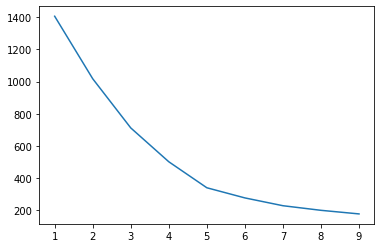

In [ ]:
sns.lineplot(k7,wcss7)

Therefore, we use 5 as n_cluster value

In [ ]:
mdl7_a = KMeans(n_clusters=5)
mdl7_a.fit(df7.iloc[:,1:3])
print('SSE Data 7: '+str(mdl7_a.inertia_))

SSE Data 7: 340.0955869531268


In [ ]:
mdl7_a.labels_

In [ ]:
df7['predictedclass7a'] = mdl7_a.labels_ + 1

In [ ]:
mdl7_a.cluster_centers_

array([[ 0.00909089, -0.02326302],
       [ 1.1258747 ,  1.25385075],
       [-1.08116062, -1.30840123],
       [ 1.32634626, -1.01080009],
       [-1.24006227,  1.15081667]])

(b) Use  K-means and clustering methods to group similar countries together

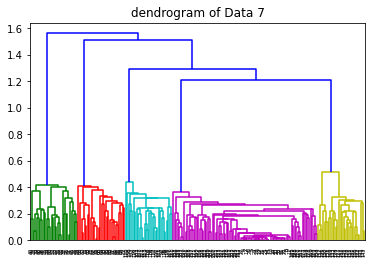

In [238]:
z7 = linkage(df1.iloc[:,1:3],method='single')
dendrogram(z7)
plt.title('dendrogram of Data 7')
plt.show()

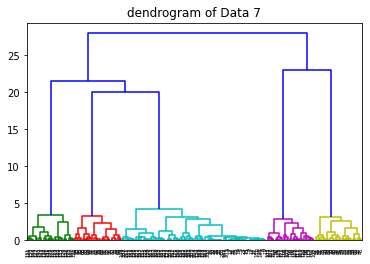

In [ ]:
z7 = linkage(df1.iloc[:,1:3],method='ward')
dendrogram(z7)
plt.title('dendrogram of Data 7')
plt.show()

Therefore, we use 5 as n_cluster value

In [239]:
mdl7_b = AgglomerativeClustering(n_clusters=5)
mdl7_b.fit(df7.iloc[:,1:3])
mdl7_b.labels_

array([2, 0, 1, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [ ]:
df7['predictedclass7b'] = mdl7_b.labels_ + 1

2. Evaluate the performance of the clustering algorithm using external validation metrics

In [ ]:
df7

,Unnamed: 0,X1,X2,Class,predictedclass7a,predictedclass7b
0,1,-3.000000,-3.000000,5,3,3
1,2,-3.000000,3.000000,4,5,1
2,3,3.000000,-3.000000,6,4,2
3,4,3.000000,3.000000,3,2,4
4,5,-0.417091,0.114782,1,1,5
...,...,...,...,...,...,...
765,766,-1.604434,-1.118861,2,3,3
766,767,-3.050000,-3.050000,5,3,3
767,768,-3.050000,2.950000,4,5,1
768,769,2.950000,-3.050000,6,4,2


In [ ]:
contingency_matrix7k = metrics.cluster.contingency_matrix(df7['Class'], df7['predictedclass7a'])
contingency_matrix7k

array([[395,   0,   0,   0,   0],
       [  0,  88,  87,  92,  96],
       [  0,   3,   0,   0,   0],
       [  0,   0,   0,   0,   3],
       [  0,   0,   3,   0,   0],
       [  0,   0,   0,   3,   0]])

In [ ]:
purity7k = np.sum(np.amax(contingency_matrix7k, axis=0)) / np.sum(contingency_matrix7k) 
purity7k

0.9844155844155844

In [ ]:
contingency_matrix7h = metrics.cluster.contingency_matrix(df7['Class'], df7['predictedclass7b'])
contingency_matrix7h

array([[  0,   0,   0,   0, 395],
       [110, 101,  78,  74,   0],
       [  0,   0,   0,   3,   0],
       [  3,   0,   0,   0,   0],
       [  0,   0,   3,   0,   0],
       [  0,   3,   0,   0,   0]])

In [ ]:
purity7h = np.sum(np.amax(contingency_matrix7h, axis=0)) / np.sum(contingency_matrix7h) 
purity7h

0.9844155844155844

In [ ]:
print('df7 fowlkes mallows score for K-means method: ' + str(fowlkes_mallows_score(df7.iloc[:,3], df7['predictedclass7a'])))
print('df7 fowlkes mallows score for hierarchical method: ' + str(fowlkes_mallows_score(df7.iloc[:,3], df7['predictedclass7b'])))

df7 fowlkes mallows score for K-means method: 0.8052354860303211
df7 fowlkes mallows score for hierarchical method: 0.8071106197090162


The purity and fowlkes mallows score are almost the same for the two methods. Which means in both methods, clusters contain some examples
from other classes, and there are some dissimilarity between the clusters and the benchmark classifications.

3. Plot (2D or 3D) the data points for each dataset and color them according to the original class

In [ ]:
fig = px.scatter(df7, x='X1', y='X2', color = 'Class')
fig.show()

4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm

In [ ]:
# According to k-means
fig = px.scatter(df7, x='X1', y='X2', color = 'predictedclass7a')
fig.show()

In [ ]:
# According to hierarchical clustering method
fig = px.scatter(df7, x='X1', y='X2', color = 'predictedclass7b')
fig.show()

**Data 8**

In [ ]:
df8

,Unnamed: 0,X1,X2,X3,Class
0,1,0.000000,0.000000,1.00000,1
1,2,0.000000,0.052336,0.99863,1
2,3,0.049774,0.016173,0.99863,1
3,4,0.030762,-0.042341,0.99863,1
4,5,-0.030762,-0.042341,0.99863,1
...,...,...,...,...,...
3997,3998,0.049774,-0.016173,-0.99863,1
3998,3999,0.000000,-0.052336,-0.99863,1
3999,4000,-0.049774,-0.016173,-0.99863,1
4000,4001,-0.030762,0.042341,-0.99863,1


1. (a) Use K-means clustering methods to generate clusters

In [ ]:
k8 = []
wcss8 = []
for i8 in range(1,10):
  mdl8 = KMeans(n_clusters=i8)
  mdl8.fit(df8.iloc[:,1:4])
  k8.append(i8)
  wcss8.append(mdl8.inertia_)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



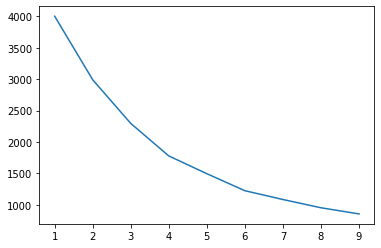

In [ ]:
sns.lineplot(k8,wcss8)

In [ ]:
sil8 = []
k8s = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for ks8 in range(2,10):
  kmeans8 = KMeans(n_clusters = ks8)
  kmeans8.fit(df8.iloc[:,1:4])
  labels = kmeans8.labels_
  k8s.append(ks8)
  sil8.append(metrics.silhouette_score(df8.iloc[:,1:4], labels))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



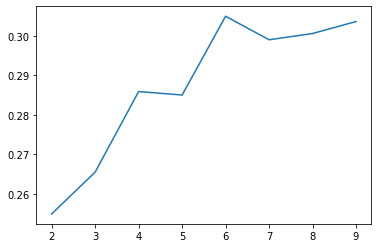

In [ ]:
sns.lineplot(k8s,sil8)

Peek at 6. Therefore, we use 6 as n_cluster value

In [ ]:
mdl8_a = KMeans(n_clusters=6)
mdl8_a.fit(df8.iloc[:,1:4])
print('SSE Data8: '+str(mdl8_a.inertia_))

SSE Data8: 1226.5163224647822


In [ ]:
df8['predictedclass8a'] = mdl8_a.labels_ + 1

In [ ]:
mdl8_a.cluster_centers_

array([[-0.02466459, -0.64145868,  0.5289144 ],
       [ 0.4972794 ,  0.42168636,  0.51731322],
       [-0.50210751, -0.41307738, -0.51853859],
       [ 0.66865429, -0.33453287, -0.36801353],
       [ 0.02484991,  0.6416588 , -0.53070233],
       [-0.66755519,  0.33538421,  0.37276264]])

(b) Use hierarchical clustering methods to generate clusters

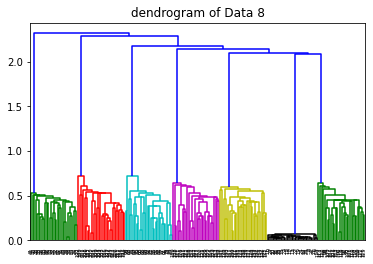

In [ ]:
z8 = linkage(df1.iloc[:,1:4],method='single')
dendrogram(z8)
plt.title('dendrogram of Data 8')
plt.show()

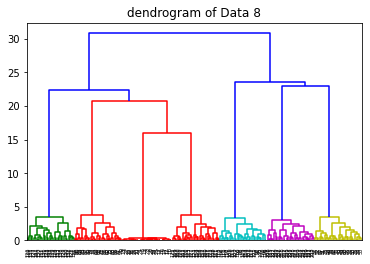

In [ ]:
z8 = linkage(df1.iloc[:,1:4],method='ward')
dendrogram(z8)
plt.title('dendrogram of Data 8')
plt.show()

Therefore, we use 7 as n_cluster value

In [ ]:
mdl8_b = AgglomerativeClustering(n_clusters=7)
mdl8_b.fit(df8.iloc[:,1:4])
mdl8_b.labels_

array([3, 3, 3, ..., 0, 5, 0])

In [ ]:
df8['predictedclass8b'] = mdl8_b.labels_ + 1

2. Evaluate the performance of the clustering algorithm using external validation metrics

In [ ]:
df8

,Unnamed: 0,X1,X2,X3,Class,predictedclass8a,predictedclass8b
0,1,0.000000,0.000000,1.00000,1,6,4
1,2,0.000000,0.052336,0.99863,1,6,4
2,3,0.049774,0.016173,0.99863,1,6,4
3,4,0.030762,-0.042341,0.99863,1,6,4
4,5,-0.030762,-0.042341,0.99863,1,6,4
...,...,...,...,...,...,...,...
3997,3998,0.049774,-0.016173,-0.99863,1,4,1
3998,3999,0.000000,-0.052336,-0.99863,1,4,1
3999,4000,-0.049774,-0.016173,-0.99863,1,4,1
4000,4001,-0.030762,0.042341,-0.99863,1,4,6


In [ ]:
contingency_matrix8k = metrics.cluster.contingency_matrix(df8['Class'], df8['predictedclass8a'])
contingency_matrix8k

array([[667, 667, 668, 666, 668, 666]])

In [ ]:
purity8k = np.sum(np.amax(contingency_matrix8k, axis=0)) / np.sum(contingency_matrix8k) 
purity8k

1.0

In [ ]:
contingency_matrix8h = metrics.cluster.contingency_matrix(df8['Class'], df8['predictedclass8b'])
contingency_matrix8h

array([[787, 638, 572, 540, 477, 555, 433]])

In [ ]:
purity8h= np.sum(np.amax(contingency_matrix8h, axis=0)) / np.sum(contingency_matrix8h) 
purity8h

1.0

In [ ]:
print('df8 fowlkes mallows score for K-means method: ' + str(fowlkes_mallows_score(df8.iloc[:,4], df8['predictedclass8a'])))
print('df8 fowlkes mallows score for hierarchical method: ' + str(fowlkes_mallows_score(df8.iloc[:,4], df8['predictedclass8b'])))

df8 fowlkes mallows score for K-means method: 0.40799342545714923
df8 fowlkes mallows score for hierarchical method: 0.3842578768955405


The purity for both methods are 1.0 which means each cluster contains only examples from the same class. The fowlkes mallows score shows that there are  similarity between the clusters and the benchmark classifications is moderate, and the k-means method has slightly more similarity than the hierarchical method.

3. Plot (2D or 3D) the data points for each dataset and color them according to the original class

In [ ]:
fig = px.scatter_3d(df8, x='X1', y='X2', z='X3', color = 'Class')
fig.show()

4. Plot (2D or 3D) the data points for each dataset and color them according to the class allocated by the clustering algorithm

In [ ]:
# According to k-means method
fig = px.scatter_3d(df8, x='X1', y='X2', z='X3', color = 'predictedclass8a')
fig.show()

In [ ]:
# Accoridng to the hierarchical clustering method
fig = px.scatter_3d(df8, x='X1', y='X2', z='X3', color = 'predictedclass8b')
fig.show()

**Task 2**

The world indicators dataset compares different countries based on selected attributes.
1. Use K-means and hierarchical clustering methods to group similar countries
together
2. Use Internal validation metrics to report the cluster quality
3. Report the best clustering solution. Give a detailed list of all the groups and the
countries included within the groups
4. Generate three different scatter plots of your choice and color the data points
according to the group. Example: “Life expectancy vs GDP”, “Infant Mortality vs
GDP”, etc.


In [186]:
df_WI = pd.read_csv('/content/drive/MyDrive/IE 5374/Project1/World Indicators.csv')

In [187]:
df_WI.isnull().sum()

Birth Rate                 9
Business Tax Rate         27
Days to Start Business    27
Energy Usage              72
GDP                       20
Health Exp % GDP          23
Health Exp/Capita         23
Hours to do Tax           28
Infant Mortality Rate     20
Internet Usage             9
Lending Interest          77
Life Expectancy Female    11
Life Expectancy Male      11
Mobile Phone Usage        12
Population 0-14           17
Population 15-64          17
Population 65+            17
Population Urban           2
Region                     0
Country                    0
dtype: int64

In [200]:
# Remove rows with incomplete information
df_WI = df_WI.drop(['Energy Usage', 'Lending Interest'], axis=1)
df_WI.dropna(axis=0, inplace=True)

In [ ]:
df_WI

In [ ]:
df_WI.dtypes

In [ ]:
# Modify the dataset

In [203]:
df_WI1 = df_WI.copy()
df_WI1.rename(columns={'Business Tax Rate': 'Business Tax Rate Percentage'}, inplace=True)

In [ ]:
df_WI1['Business Tax Rate Percentage'] = pd.to_numeric(df_WI1['Business Tax Rate Percentage'].str.replace('%', ''))
df_WI1['Health Exp/Capita'] = pd.to_numeric(df_WI1['Health Exp/Capita'].str.replace('$', '').str.replace(',', ''))
df_WI1['GDP'] = pd.to_numeric(df_WI1['GDP'].str.replace('$', '').str.replace(',', ''))
df_WI1.head(2)

In [ ]:
df_WI1.isnull().sum()

In [208]:
from sklearn.preprocessing import StandardScaler
df_WI2 = StandardScaler().fit_transform(df_WI1.iloc[:, :-2])
df_WI3 = pd.DataFrame(df_WI2, columns = df_WI1.iloc[:, :-2].columns)

In [209]:
# Use elbow method to find the appropriate n cluster value
k_WI = []
wcss_WI = []
for i_WI in range(1,10):
    mdl_WI = KMeans(n_clusters=i_WI)
    mdl_WI.fit(df_WI3)
    k_WI.append(i_WI)
    wcss_WI.append(mdl_WI.inertia_) 

In [ ]:
sns.lineplot(k_WI,wcss_WI)

In [211]:
sil = []
ks = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for ksq in range(2,10):
  kmeans = KMeans(n_clusters = ksq)
  kmeans.fit(df_WI3)
  labels = kmeans.labels_
  ks.append(ksq)
  sil.append(metrics.silhouette_score(df_WI3, labels))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



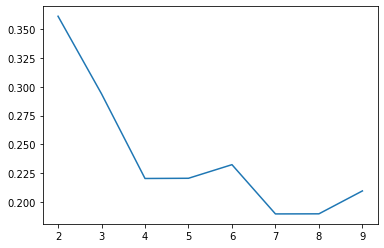

In [212]:
sns.lineplot(ks,sil)

Peek at 2. Therefore, we use 2 as n_cluster value  for k-means method

In [224]:
mdl_WI_a = KMeans(n_clusters=2)
mdl_WI_a.fit(df_WI3.iloc[:, 0:16])
print('SSE Data WI: '+str(mdl_WI_a.inertia_))

SSE Data WI: 1665.9747244540863


In [225]:
df_WI3['predictedclassA'] = mdl_WI_a.labels_

In [215]:
mdl_WI_a.cluster_centers_

array([[ 0.95423555,  0.19248332,  0.26247705, -0.23332838, -0.18845011,
        -0.51109876,  0.06679201,  0.92958914, -0.92462912, -0.92788156,
        -0.89872303, -0.80910528,  0.99325861, -0.92363995, -0.77369659,
        -0.74000073],
       [-0.71080811, -0.14338044, -0.19551862,  0.17380583,  0.1403761 ,
         0.38071643, -0.04975323, -0.69244905,  0.68875434,  0.69117708,
         0.66945695,  0.60270087, -0.73987631,  0.68801752,  0.57632501,
         0.55122503]])

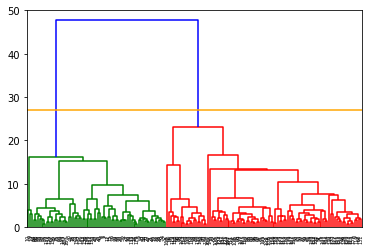

In [216]:
import scipy.cluster.hierarchy as shc
dend = shc.dendrogram(shc.linkage(df_WI3, method='ward'))
plt.axhline(y=27, c='orange')

In [217]:
df_WI3['Region'] = df_WI1.iloc[:, -2]
df_WI3['Country'] = df_WI1.iloc[:, -1]

Therefore, we use 2 as n_cluster value for hierarchical method

In [218]:
mdl_WI_b = AgglomerativeClustering(n_clusters=2)
mdl_WI_b.fit(df_WI3.iloc[:,0:16])
mdl_WI_b.labels_

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [219]:
df_WI3['predictedclassB'] = mdl_WI_b.labels_

2.Use Internal validation metrics to report the cluster quality

Calinski harabasz score:

In [220]:
print("calinski harabasz score for kmeans:" + str(metrics.calinski_harabasz_score(df_WI3.iloc[:, 0:16], mdl_WI_a.labels_)))
print("calinski harabasz score for heirarichal:" + str(metrics.calinski_harabasz_score(df_WI3.iloc[:, 0:16], mdl_WI_b.labels_)))

calinski harabasz score for kmeans:108.54562732127647
calinski harabasz score for heirarichal:105.43473274338285


Dunn score:

In [221]:
dist_world_indicators = pairwise_distances(df_WI3.iloc[:, 0:16])
print("Dunn score for Kmeans:" + str(dunn(dist_world_indicators, mdl_WI_a.labels_)))
print("Dunn score for Heirarichal:" + str(dunn(dist_world_indicators, mdl_WI_b.labels_)))

NameError: ignored

Conclusion: The Calinski-Harabasz coefficient yields the largest value when k=2 for k-means, which means the dispersion between clusters is maximized and cohesion within clusters is minimized when dividing into 2 clusters. The Silhouette Coefficient is highest when k = 2, the 0.921 Silhouette Coefficient means there is a high separation between clusterse at that time. 

3.Report the best clustering solution. Give a detailed list of all the groups and the countries included within the groups

In [222]:
print(df_WI3['predictedclassA'].value_counts())
print(df_WI3['predictedclassB'].value_counts())

1    98
0    73
Name: predictedclassA, dtype: int64
0    98
1    73
Name: predictedclassB, dtype: int64


In [228]:
df_WI3

,Birth Rate,Business Tax Rate Percentage,Days to Start Business,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,Infant Mortality Rate,Internet Usage,Life Expectancy Female,Life Expectancy Male,Mobile Phone Usage,Population 0-14,Population 15-64,Population 65+,Population Urban,predictedclassA,Region,Country,predictedclassB
0,0.241085,0.733673,-0.099269,-0.145350,-0.874226,-0.454207,0.662583,-0.174521,-0.934401,-0.018487,0.167855,-0.130010,-0.158467,0.668944,-0.558750,0.541928,0,Africa,Algeria,0
1,2.169232,0.189712,0.611634,-0.210537,-1.238575,-0.483635,-0.007818,3.159010,-0.934401,-1.895467,-1.979233,-1.152154,1.730363,-1.888970,-0.982336,-0.636900,1,Africa,Angola,1
2,1.342883,0.566931,-0.029912,-0.277006,-0.837791,-0.560683,-0.055420,1.293820,-1.291058,-1.203948,-1.075196,-0.385546,1.315742,-1.326792,-0.890252,-0.576447,1,Africa,Benin,1
3,0.149269,-0.701399,0.507600,-0.271515,-0.582746,-0.362713,-0.523511,0.460438,-0.934401,-2.586986,-2.318247,1.403207,0.468072,-0.118107,-0.779751,0.036716,1,Africa,Botswana,1
4,1.801966,-0.045366,-0.307338,-0.274877,-0.145527,-0.558008,-0.055420,1.611300,-1.291058,-1.599102,-1.414210,-1.152154,1.555301,-1.635990,-0.963919,-1.258699,1,Africa,Burkina Faso,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.401630,-0.471787,11.500591,-0.279018,-0.291267,-0.316698,-0.337068,-0.214206,-0.221086,0.179090,-0.058154,0.125526,-0.057115,0.261364,-0.227248,0.459885,1,The Americas,"Bahamas, The",1
167,-0.677080,-0.438986,0.178157,-0.265760,-0.546311,-0.078600,-0.293432,-0.293575,0.848886,0.080302,-0.171159,1.147671,-0.757364,1.048414,0.141088,-2.018676,0,The Americas,Barbados,0
168,-0.860713,0.036638,-0.446051,10.382036,3.971623,3.951423,-0.384670,-0.849164,1.205544,0.870609,0.958887,-0.130010,-0.849502,0.500290,1.025093,1.090320,0,The Americas,Belize,0
169,-0.677080,-0.089102,-0.411373,-0.249585,0.728912,0.070145,0.206393,-0.690424,0.492229,0.771821,0.619873,1.147671,-0.609943,0.064601,1.135594,1.681893,0,NaN,NaN,0


Both KMeans and Heirarichal has divided the data into similar classes and data points in both the classes. We also have a similar dunn score and calinski harabasz score.

4.Generate three different scatter plots of your choice and color the data points according to the group. Example: “Life expectancy vs GDP”, “Infant Mortality vs GDP”, etc.


In [229]:
fig = px.scatter(df_WI3, x='Infant Mortality Rate', y='Birth Rate', color = 'predictedclassA', title="Infant Mortality Rate VS Birth Rate")
fig.show()

In [231]:
fig = px.scatter(df_WI3, x='Mobile Phone Usage', y='Internet Usage', color = 'predictedclassA', title="Mobile Phone Usage VS Internet Usage")
fig.show()

In [184]:
fig = px.scatter(df_WI, x='Life Expectancy Male', y='Life Expectancy Female', color = 'predictedclass', title="Life Expectancy Male VS Life Expectancy Female")
fig.show()

NameError: ignored

In [232]:
fig = px.scatter(df_WI3, x='Infant Mortality Rate', y='Birth Rate', color = 'predictedclassA', title="Infant Mortality Rate VS Birth Rate")
fig.show()